# Estimate Sobol’ indices for the Ishigami function by a sampling method: a quick start guide to sensitivity analysis

### Analyse de la fonction Ishigami avec l'ensemble de codes dévelopés pour l'analyse de sensibilité sur les cahmps stochastiques.

#### Comparaison et corréctions

La même logique d'écriture de codes est utilisée que dans le script 'Demo Analyse de sensibilité poutre' : https://openturns.github.io/openturns/master/examples/reliability_sensitivity/sensitivity_sobol.html

In [1]:
import sys
sys.path.insert(0, '../')
# Voici les deux scripts destinés à gérer l'analyse de sensibilité sur les champs stochastiques
import StochasticProcessSensitivity as ngps
import StochasticProcessConstructor as ngpc
import StochasticProcessSensitivityIndices as ngpsi
# Classes utilitaires
import numpy                        as np
import openturns                    as ot
from   importlib                import reload 

In [2]:
# This is the formula used in the openTURNS example. 
formula = ['sin(X1) + 7. * sin(X2)^2 + 0.1 * X3^4 * sin(X1)']
input_names = ['X1', 'X2', 'X3']
g = ot.SymbolicFunction(input_names, formula)

# we have to modifiy the function, be cause it takes as an input a random vector, un-correlated
# in the case of our method, un-correlated inputs are clearly distinct. 
def gMod(X1,X2,X3):
    X = np.stack([X1,X2,X3]).T
    return g(X)

In [3]:
X = np.random.uniform(-np.pi,np.pi,[10,3])
assert gMod(X[...,0], X[...,1], X[...,2]) == g(X) ,""

Maintenant nous définissons nos variables d'entrée, avec les fonctions contenues dans notre méthode 

In [4]:
reload(ngpc)
reload(ngps)
lower  = -np.pi
upper  = np.pi
nameX1, nameX2, nameX3 = 'X1', 'X2', 'X3'
RV_X1 = ot.Arcsine(lower,upper)
RV_X1.setName(nameX1)
RV_X2 = ot.Arcsine(lower,upper)
RV_X2.setName(nameX2)
RV_X3 = ot.Arcsine(lower,upper)
RV_X3.setName(nameX3)

In [5]:
# here we have to explicitely define our outputs
outputVariables = {'out1_name' :  #any name here is fine
                   {
                         'name'     : 'Y',
                         'position' : 0,   #Position in the ouput, if the output were a list
                         'shape'    : (1,)  
                    },
                  }

In [6]:
inputList    = [RV_X1, RV_X2, RV_X3]
soloFunction = sampleFunction = gMod #Easy in this case
size         = 100000

In [7]:
processSensitivityAnalysis = ngps.StochasticProcessSensitivityAnalysis(inputList, 
                                                                       outputVariables,
                                                                       sampleFunction,
                                                                       soloFunction,
                                                                       size)

Input Variables are (without Karhunen Loeve Decomposition) :
 X1 X2 X3 

Output Variables are :
 ['Y'] 

Composed distribution built with processes and distributions: X1; X2; X3
Program initialised, ready for sensitivity analysis. You can now proceed to prepare the Sobol indices experiment



In [8]:
processSensitivityAnalysis.run(gentype = 1)

Generation types are:
1 : Random (default)
2 : LHS
3 : LowDiscrepancySequence
4 : SimulatedAnnealingLHS
You choose Random generation
number of samples for sobol experiment =  500000 

input design shape is:  (500000, 3)
Converting list of outputs into matrix...
Output variable 1 has shape (500000, 1)
Final matrix shape: (500000, 1)
Columns where nan :  [] 


No errors while processing, the function has returned no np.nan.



In [9]:
processSensitivityAnalysis.getSensitivityAnalysisResults()

You have chosen to use the Saltelli method
There are 1 distinct outputs
Implicit dimension = 3
Implicit description: [X0,X1,X2]
There are 3 indices to get in (1,) dimensions with 1 elements
basic output shape is: (100000, 1)
output reshaped into matrix of shape (dim<=2)  [100000, 1]
data for variance calculus prepared 
 X_fo shape is (100000,) Y_fo shape is (100000,) 

variance 1D is: 1.4796767005182886e-05 

variance 1D is: 1.5062425669470411e-05 

basic output shape is: (100000, 1)
output reshaped into matrix of shape (dim<=2)  [100000, 1]
data for variance calculus prepared 
 X_fo shape is (100000,) Y_fo shape is (100000,) 

variance 1D is: 1.2295257923198126e-05 

variance 1D is: 5.479784408960027e-06 

basic output shape is: (100000, 1)
output reshaped into matrix of shape (dim<=2)  [100000, 1]
data for variance calculus prepared 
 X_fo shape is (100000,) Y_fo shape is (100000,) 

variance 1D is: 1.6183192469681646e-05 

variance 1D is: 6.021961328804051e-06 

Indices successfully

half of the length of the symetric confidence interval 
half of the length of the symetric confidence interval 
The output is scalar
The sensitivity is measured accordingly to the 3 input variables, namely:
 X1 and X2 and X3
That's good


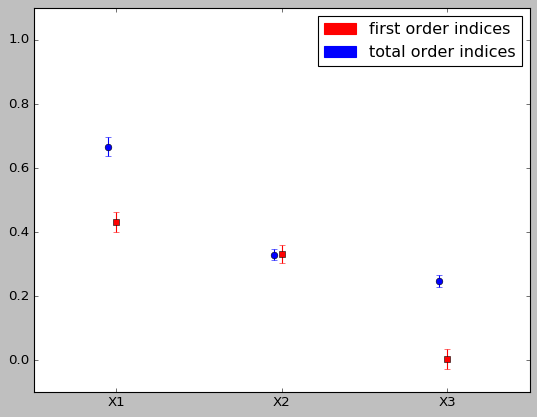

In [13]:
processSensitivityAnalysis.SensitivityAnalysisResults[0].draw()

In [11]:
for i,j in enumerate(processSensitivityAnalysis.outputVariables.keys()):
    print(i,j)

0 out1_name
